<a href="https://colab.research.google.com/github/ridhapadelia/Data-Mining-Checkpoint-2/blob/main/Data_Mining_Checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Tingkat Adaptibilitas Siswa Dan Mahasiswa Dalam Pendidikan Online Berdasarkan Faktor-Faktor Yang Mempengaruhi**

#**Import Library**

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis ini adalah untuk mengevaluasi tingkat adaptabilitas siswa dan mahasiswa dalam pendidikan online dengan memahami faktor-faktor yang mempengaruhinya. Hal ini akan membantu institusi pendidikan dan pembuat kebijakan untuk meningkatkan efektivitas pendidikan online dan memberikan dukungan yang sesuai kepada siswa dan mahasiswa. Dengan ini, diharapkan dapat meningkatkan kualitas pembelajaran serta memperkuat adaptasi siswa dan mahasiswa di masa depan.



##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah respons terhadap meningkatnya ketergantungan pada pembelajaran online akibat pandemi Covid-19 yang pernah melanda di hampir seluruh negara, juga dengan kondisi saat ini yang sudah mulai terbebas dari Covid-19 tetapi terkadang masih menggunakan pembelajaran secara online. Meskipun pembelajaran online menjadi solusi utama, terdapat tantangan dalam adaptasi siswa dan mahasiswa terhadap model pembelajaran ini.



##**Data Mining Goals**

Tujuan dari data mining pada dataset ini adalah untuk menganalisis dan mendalami tingkat adaptibilitas siswa dan mahasiswa dalam lingkungan pendidikan online dengan mempertimbangkan faktor-faktor yang mempengaruhi adaptibilitas mereka.



##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber data yang ada, lalu menyiapkan data dan menjelaskan karakteristik data serta pola-pola yang menarik akan diidentifikasi. Data kemudian dieksplorasi untuk mengidentifikasi korelasi antar variabel. Selanjutnya, melakukan analisis mendalam terhadap pola-pola yang ditemukan dan mengevaluasi relevansi korelasi tersebut terhadap tujuan analisis, lalu menginterpretasikan hasil analisis.



#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Students Adaptibilty Level In Online Education" ini diperoleh dari Kaggle, berikut tautannya: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [4]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


##**Describe Data**

####Informasi Dasar

In [ ]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1205, 14)


dataset "Students Adaptibility Level in Online Education" ini terdiri dari 1205 baris dan 14 kolom

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**1. Kolom Gender**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis kelamin siswa dan mahasiswa tersebut, apakah laki-laki atau perempuan (Male/Female).

**2. Kolom Age**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai rentang umur siswa dan mahasiswa.

**3. Kolom Education Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai tingkat pendidikan yang ditempuh (University, College, atau School).

**4. Kolom Institution Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis institusi pendidikan siswa dan mahasiswa tersebut, apakah pemerintah atau bukan pemerintah (Goverment/Non Government).

**5. Kolom IT Student**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan apakah siswa dan mahasiswa tersebut termasuk siswa atau mahasiswa IT (Yes/No).

**6. Kolom Location**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah siswa dan mahasiswa tersebut tinggal di daerah perkotaan (Yes/No).

**7. Kolom Load-Shedding**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai level pemadaman listrik di lokasi siswa dan mahasiswa tersebut tinggal, apakah sering dilakukan pemadaman atau jarang (Low/High).

**8. Kolom Financial Condition**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai kondisi finansial keluarga siswa atau mahasiswa tersebut apakah berkecukupan, menengah, atau kurang mampu. (Rich, Mid, Poor).

**9. Kolom Internet type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis koneksi internet yang digunakan oleh siswa dan mahasiswa, apakah menggunakan mobile data atau wifi.

**10. Kolom Network Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis jaringan apa yang digunakan, apakah 4G, 2G atau 3G.

**11. Kolom Class Duration**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai durasi kelas yang dihadiri dalam pembelajaran online.

**12. Kolom Self Lms**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah institusi menyediakan Lms (Learning Management System) bagi siswa dan mahasiswa.

**13. Kolom Device**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai perangkat-perangkat apa saja yang digunakan oleh siswa maupun mahasiswa dalam pembelajaran online, apakah melalui perangkat mobile, komputer, atau tab.

**14. Kolom Adaptivity Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan tingkat adaptablitas siswa maupun mahasiswa terhadap hadirnya pembelajaran online.

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


**1. Kolom Gender**

Dari total 1205 data yang ada pada kolom Gender ini, terdapat 2 nilai unik yaitu "Boy" dan "Girl". Nilai yang paling sering muncul yaitu "Boy" yang artinya mayoritas responden berjenis kelamin laki-laki dengan frekuensi sebanyak 663 responden.

**2. Kolom Age**

Dari total 1205 data yang ada pada kolom Age ini, terdapat 6 nilai unik yaitu rentang usia responden antara "1-5", "6-10", "11-15", "16-20", "21-25", dan "25-30". Nilai yang paling sering muncul yaitu "21-25" yang artinya mayoritas responden berusia antara 21-25 tahun dengan frekuensi sebanyak 374 responden.

**3. Kolom Education Level**

Dari total 1205 data yang ada pada kolom Education Level ini, terdapat 3 nilai unik yaitu "School", "University", dan "College". Nilai yang paling sering muncul yaitu "School" yang artinya mayoritas responden adalah seorang siswa dengan frekuensi sebanyak 530 responden

**4. Kolom Instituation Type**

Dari total 1205 data yang ada pada kolom Institution Type ini, terdapat 2 nilai unik yaitu "Government" dan "Non Government". Nilai yang paling sering muncul yaitu "Non Goovernment" yang artinya mayoritas responden belajar di instititusi non pemerintah dengan frekuensi sebanyak 823 responden.

**5. IT Student**

Dari total 1205 data yang ada pada kolom IT Student ini, terdapat 2 nilai unik yaitu "Yes" dan "No". Nilai yang paling sering muncul yaitu "No", yang artinya mayoritas responden bukan merupakan siswa atau mahasiswa IT dengan frekuensi sebanyak 901 respoden.

**6. Location**

Kolom Location ini untuk mengetahui apakah siswa dan mahasiswa tinggal di kota. Dari total 1205 data yang ada pada kolom Location ini, terdapat 2 nilai unik yaitu "Yes" dan "No". Nilai yang paling sering muncul yaitu "Yes" yang artinya mayoritas responden tinggal di kota dengan frekuensi sebanyak 935 responden.

**7. Load-Shedding**

Dari total 1205 data yang ada pada kolom Load-Shedding ini, terdapat 2 nilai unik yaitu "Low" dan "High". Nilai yang paling sering muncul yaitu "Low" yang artinya mayoritas daerah tempat tinggal responden dilakukannya pemadaman listrik cukup rendah dengan frekuensi sebanyak 1004 responden.

**8. Financial Condition**

Dari total 1205 data yang ada pada kolom Financial Condition ini, terdapat 3 nilai unik yaitu "Rich", "Mid", dan "Poor". Nilai yang paling sering muncul yaitu "Mid" yang artinya mayoritas responden berasal dari keluarga yang memiliki kondisi finansial menengah dengan frekuensi sebanyak 878 responden.

**9. Internet Type**

Dari total 1205 data yang ada pada kolom Internet Type ini, terdapat 2 nilai unik yaitu "Wifi" dan "Mobile Data". Nilai yang paling sering muncul yaitu "Mobile Data" yang artinya mayoritas responden mengakses internet melalui Moobile Data dengan frekuensi sebanyak 695 responden.

**10. Network Type**

Dari total 1205 data yang ada pada kolom Network Type ini, terdapat 3 nilai unik yaitu "4G", "3G" dan "2G". Nilai yang paling sering muncul yaitu "4G" yang artinya mayoritas responden menggunakan jaringan 4G dengan frekuensi sebanyak 775 responden.

**11. Class Duration**

Dari total 1205 data yang ada pada kolom Class Duration ini, terdapat 3 nilai unik yaitu "1-3", "3-6" dan "0". Nilai yang paling sering muncul yaitu "1-3" yang artinya mayoritas responden menghadiri kelas dengan duurasi 1-3 jam dengan frekuensi sebanyak 840 responden.

**12. Self LMS**

Dari total 1205 data yang ada pada Self LLMS ini, terdapat 2 nilai unik yaitu "Yes" dan "No". Nilai yang paling sering muncul yaitu "No" yang artinya mayoritas responden tidak menggunakan LMS dengan frekuensi sebanyak 995 responden.

**13. Device**

Dari total 1205 data yang ada pada kolom Device ini, terdapat 3 nilai unik yaitu "Mobile", "Computer" dan "Tab". Nilai yang paling sering muncul yaitu "Mobile" yang artinya mayoritas menggunakan perangkat Mobile untuk melakukan aktivitas pembelajaran online dengan frekuensi sebanyak 1013 responden.

**14. Adaptivity Level**

Dari total 1205 data yang ada pada kolom Adaptivity Level ini, terdapat 3 nilai unik yaitu "Moderate", "Low" dan "High". Nilai yang paling sering muncul yaitu "Moderate" yang artinya mayoritas responden memiliki tingkat adaptablititas sedang dengan frekuensi sebanyak 625 responden.


##**Exploratory Data Analysis**

**Perangkat apa yang paling banyak digunakan oleh siswa maupun mahasiswa dalam pembelajaran online?**

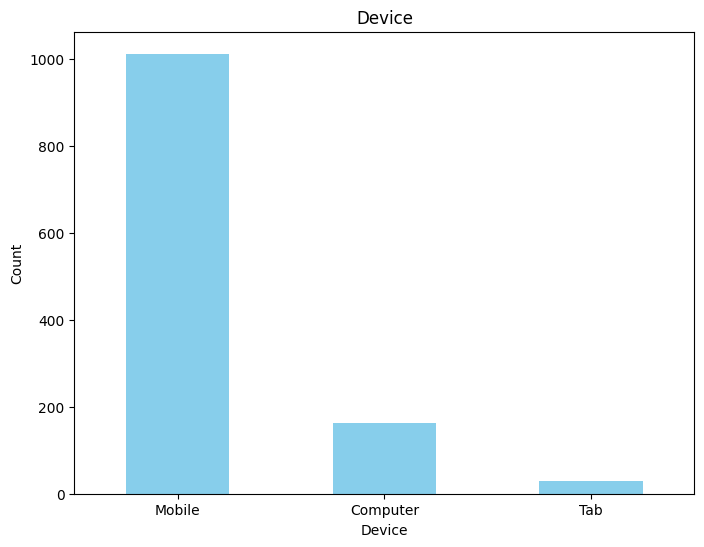

In [45]:
plt.figure(figsize=(8, 6))
df['Device'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa perangkat mobile merupakan perangkat yang paling banyak digunakan oleh siswa dan mahasiswa dalam pembelajaran online ini, kemudian perangkat komputer dan yang terakhir perangkat tab yang termasuk sangat jarang digunakan.

<Axes: ylabel='Location'>

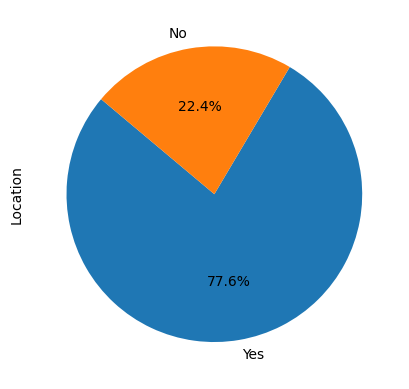

In [30]:
gender_counts  = df['Location'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa berlokasi di daerah perkotaan yaitu dengan persentase sebesar 77,6% yang menjawab Yes dan sisanya yaitu sebesar 22,4% berlokasi di luar dari daerah perkotaan.

**Apakah Siswa dan Mahasiswa berasal dari jurusan IT?**

<ipython-input-25-0542546578a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IT Student', data=df, palette='Set2')


<Axes: xlabel='IT Student', ylabel='count'>

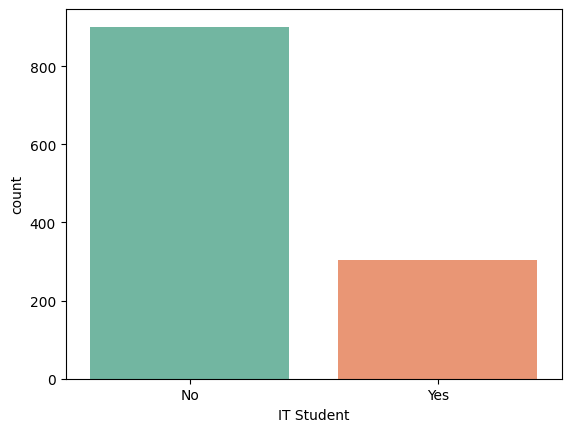

In [25]:
sns.countplot(x='IT Student', data=df, palette='Set2')

Dari visualisasi data mengenai IT Student yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa dalam dataset menjawab NO, hal ini menunjukkan bahwa responden siswa dan mahasiswa yang berpartisispasi dalam pembelajaran online ini dominan tidak berasal dari jurusan IT.

<Axes: ylabel='Education Level'>

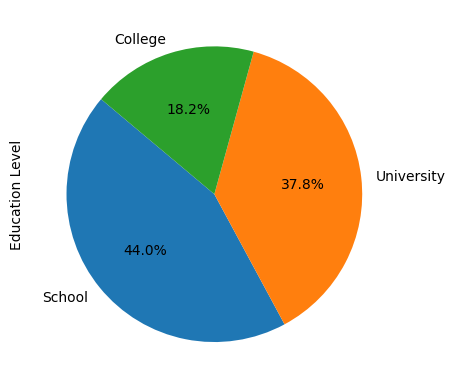

In [44]:
gender_counts  = df['Education Level'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas responden yang berpartisipasi dalam pembelajaran online ini adalah siswa yang ada pada tingkat pendidikan sekolah yaitu dengan persentase sebesar 44%.

<Axes: xlabel='Age', ylabel='Count'>

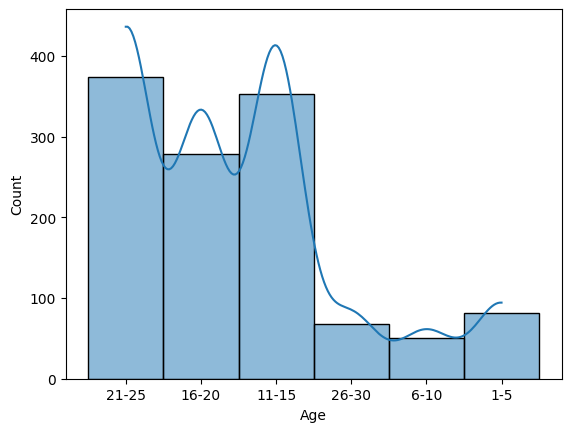

In [34]:
sns.histplot(df['Age'].dropna(), bins=10, kde=True)

Dari Visualisasi yang tersaji di atas, terlihat bahwa data umur berdistribusi tidak normal karena frekuensi setiap rentang usia tidak cukup merata.

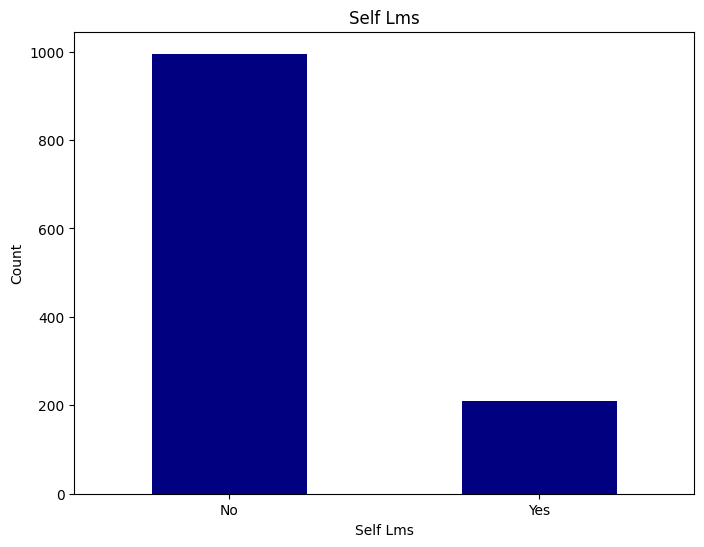

In [46]:
plt.figure(figsize=(8, 6))
df['Self Lms'].value_counts().plot(kind='bar', color='navy')
plt.title('Self Lms')
plt.xlabel('Self Lms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa menjawab No, artinya institusi pendidikan siswa dan mahasiswa tersebut tidak menyediakan Lms mereka sendiri.

Korelasi Kontingensi

In [42]:
data = df

contingency_table = pd.crosstab(df['Location'], df['Network Type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi_corr = chi2 / n
min_dim = min(contingency_table.shape) - 1
cramer_v = (phi_corr / min_dim) ** 0.5

print("Tabel Kontingensi:")
print(contingency_table)
print("\nNilai Chi-square:", chi2)
print("Nilai p:", p)
print("Koefisien Korelasi Cramer's V:", cramer_v)

Tabel Kontingensi:
Network Type  2G   3G   4G
Location                  
No            14  117  139
Yes            5  294  636

Nilai Chi-square: 46.32880652031122
Nilai p: 8.70617690465965e-11
Koefisien Korelasi Cramer's V: 0.19607942865203182


Korelasi yang disajikan merupakan korelasi antara variabel Location dan Network Type. Hasilnya menunjukkan bahwa terdapat hubungan yang signifikan antara dua variabel tersebut (diliat dari nilai Chi-Square yang cukup tinggi), artinya ada pola yang jelas dalam bagaimana lokasi siswa dan mahasiswa terkait dengan jenis jaringan yang mereka gunakan. Namun, korelasi ini bersifat lemah hingga sedang yang berarti bahwa meskipun ada hubungan antara kedua variabel, hubungannya tidak terlalu kuat.

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) *100, columns=['Null Ratio in '])

,Null Ratio in
Gender,0.0
Age,0.0
Education Level,0.0
Institution Type,0.0
IT Student,0.0
Location,0.0
Load-shedding,0.0
Financial Condition,0.0
Internet Type,0.0
Network Type,0.0


Dataset ini tidak memiliki Missing Values (nilai yang hilang) dari masing-masing kolom. Dapat terlihat dari output di atas semua kolom yang ada yaitu kolom Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level tidak memiliki nilai null di dalamnya, yang artinya semua kolom tersebut mempunyai nilai.

####Outliers Values

In [17]:
def count_values(col):
  counts = col.value_counts()
  return counts

def detect_outliers(col):

  counts = count_values(col)

  n = len(col)
  threshold = n * 0.05

  outliers = counts[counts < threshold].index

  if len(outliers) > 0:
    print(f"Terdeteksi outlier pada kolom {col.name}:")
    print(outliers)
  else:
    print(f"Tidak ada outlier pada kolom {col.name}")

for col in df.columns:
  detect_outliers(df[col])

Tidak ada outlier pada kolom Gender
Terdeteksi outlier pada kolom Age:
Index(['6-10'], dtype='object')
Tidak ada outlier pada kolom Education Level
Tidak ada outlier pada kolom Institution Type
Tidak ada outlier pada kolom IT Student
Tidak ada outlier pada kolom Location
Tidak ada outlier pada kolom Load-shedding
Tidak ada outlier pada kolom Financial Condition
Tidak ada outlier pada kolom Internet Type
Terdeteksi outlier pada kolom Network Type:
Index(['2G'], dtype='object')
Tidak ada outlier pada kolom Class Duration
Tidak ada outlier pada kolom Self Lms
Terdeteksi outlier pada kolom Device:
Index(['Tab'], dtype='object')
Tidak ada outlier pada kolom Adaptivity Level


Dapat terlihat disini terdapat 3 kolom yang terdeteksi outlier yaitu kolom Age, kolom Network Type dan kolom Device. Nilai-nilai yang terdeteksi outlier ini merupakan data-data yang jarang muncul atau kurang relevan. Seperti pada kolom Network Type jaringan "2G" saat ini sudah jarang digunakan, lalu kolom Device "Tab" juga sudah jarang digunakan dibanding dengan perangkat lain, dan terakhir pada kolom Age "6-10" kemungkinan rentang umur siswa di atas dari rentang tersebut. Dan untuk kolom-kolom yang tidak terdeteksi outlier, artinya variasi nilai pada kolom tersebut wajar.

####Duplicated Values

In [ ]:

for column in df.columns:
    if df[column].duplicated().any():
        print(f"Kolom '{column}' memiliki nilai duplikat.")
    else:
        print(f"Tidak ada nilai duplikat dalam kolom '{column}'.")


Kolom 'Gender' memiliki nilai duplikat.
Kolom 'Age' memiliki nilai duplikat.
Kolom 'Education Level' memiliki nilai duplikat.
Kolom 'Institution Type' memiliki nilai duplikat.
Kolom 'IT Student' memiliki nilai duplikat.
Kolom 'Location' memiliki nilai duplikat.
Kolom 'Load-shedding' memiliki nilai duplikat.
Kolom 'Financial Condition' memiliki nilai duplikat.
Kolom 'Internet Type' memiliki nilai duplikat.
Kolom 'Network Type' memiliki nilai duplikat.
Kolom 'Class Duration' memiliki nilai duplikat.
Kolom 'Self Lms' memiliki nilai duplikat.
Kolom 'Device' memiliki nilai duplikat.
Kolom 'Adaptivity Level' memiliki nilai duplikat.


Dataset ini memiliki Duplicated Values (nilai yang duplikat) dari masing-masing kolom. Dapat terlihat dari output di atas semua kolom yang ada yaitu kolom Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level memiliki nilai duplikat di dalamnya. Hal ini disebabkan karena dataset ini didapatkan dari survei/kuesioner yang diisi oleh responden, maka wajar jika responden ada yang memilih jawaban yang sama untuk pertanyaan-pertanyaan tertentu, jumlah responden juga cukup banyak yaitu 1205 responden oleh karena itu jawabannya bisa saja sama.

####Inconsistent Values / Noise (Optional)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)